# AutoMPG Project
## Exploratory analysis
### Prediction of fuel efficiency given 8 variables

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-info">
<b>Import data</b>
</div>

In [2]:
# Import data
df = pd.read_csv('../data/raw/auto-mpg.data-original', header = None, names = ['mpg', 'cylinders', 'displacement',
                                                                               'horsepower', 'weight', 'acceleration', 
                                                                               'model_year', 'origin', 'car_name'],
                 index_col=None, usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8], delim_whitespace=True, quotechar='"',
                 skipinitialspace=True)
df.head(20)
print(df.shape)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


(406, 9)


The dataset read from csv file has 406 rows and 9 columns.
The data dictionary specifies 398 rows and 9 columns.
We therefore have 8 too many rows. Let us see why this is the case.


<div class="alert alert-block alert-info">
<b>Explore data</b>
</div>

In [3]:
# Type of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB
None


We have eight numeric variables and one categorical variable.

In [4]:
# Null values
print(df.isnull().sum())


mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


We have 14 null values. Let's see which records contain null values.

In [5]:
# Null values
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe


The null values are not overlapping. Eight of the records have null values for 'mpg'. These were
probably the ones removed from the dataset used to build the data dictionary - makes sense as we cannot use these
build a predictive model for mpg. Next we remove these values from the dataset. We retain the original dataset,
we output data to the 'interim' data directory.

In [6]:
df_fin = df.copy()
df_fin.dropna(subset=['mpg'], inplace=True)
print("Number of null values in df_fin: {}".format(df_fin['mpg'].isnull().sum()))
print("Dataframe dimension: {}".format(df_fin.shape))

Number of null values in df_fin: 0
Dataframe dimension: (398, 9)


We now have a dataset with 398 record, as per the data dictionary, there are still 6 missing values in the horsepower
field. We will substitute these with median values.

In [7]:
median = df_fin['horsepower'].median()
df_fin['horsepower'].fillna(median, inplace=True)
print("Number of null values in horsepower column: {}".format(df_fin['horsepower'].isnull().sum()))
print("Dataframe dimension: {}".format(df_fin.shape))

Number of null values in horsepower column: 0
Dataframe dimension: (398, 9)


Now our set is ready for further analysis. We will now look at the distribution of variables and any possible outliers
or heavy tailed distributions.

In [8]:
print(df_fin.nunique())

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
car_name        305
dtype: int64


There are no columns with only one value. We therefore retain all columns. Interesting to observe that there aren't
many cars of the same type in the sample, although most cars have the same origin. There is also a fair amount of
similarity in mpg which is surprising. The following variables should be considered as categorical:
- origin (nominal)
- model_year (ordinal)
- cylinders (ordinal)

It will make sense to one-hot-encode the origin variable. We will do this later.
Next we look at the distribution of the data.
We start by splitting the response and the features.

In [9]:
# Split data into features (X) and response (y)
# Predict mpg vs other variables (excluding car name)
X = df_fin.loc[:, ('cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model_year', 'origin',
                    'car_name')]
y = df_fin.loc[:, 'mpg']

Let us look at the response first.

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

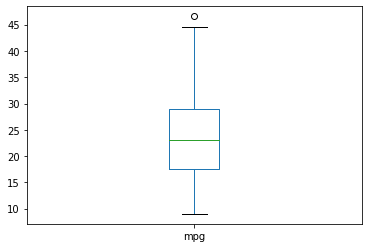

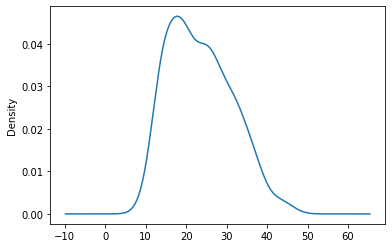

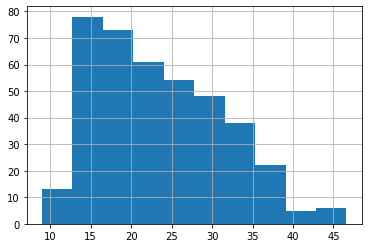

Skewness value: 0.45706634399491913


In [10]:
y.describe()
_ = y.plot(kind='box', subplots=False);
plt.show();
#y.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
_ = y.plot(kind='density', subplots=False);
plt.show();
_ = y.hist();
plt.show();
skew = y.skew()
print("Skewness value: {}".format(skew))

All looks good here. No obvious issues with the data. The one outlier at 46 is hard to believe for a car
made in the mid - eighties, but who knows, maybe it was an early hybrid prototype. Else the spread is what is expected.
The data is slightly skewed, but still approximately symmetric. No need for any normalisation (for regression purposes).

Let us look at the all the variables together.

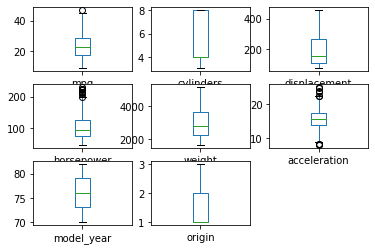

In [11]:
df_fin.describe()
df_fin_num = df_fin.copy()
df_fin_num = df_fin_num.iloc[:, 0:8]
names = ['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model_year', 'origin']
df_fin_num.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show();

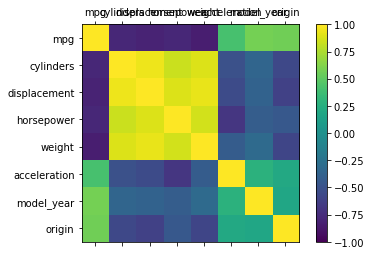

In [12]:
correlations = df_fin_num.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show();

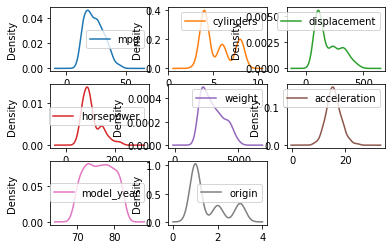

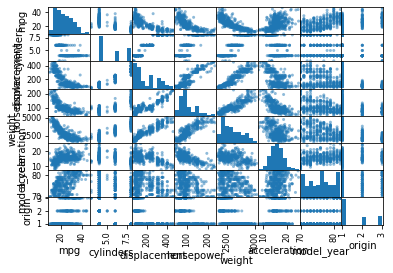

In [13]:
df_fin_num.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pd.plotting.scatter_matrix(df_fin_num)
#sns.pairplot(df_fin_num, vars=names, hue="mpg", plot_kws = {'alpha': 0.3, 's': 40, 'edgecolor': 'k'}, palette=sns.color_palette(), size = 9)
plt.show();


<div class="alert alert-block alert-info">
<b>Build Model</b>
</div>

We can now start building our model.
We begin with a simple Multi Layer Perceptron using scikit-learn to better understand the data.

In [14]:
# Put the response y into an array
y = np.ravel(y)

We start by One Hot Encoding the origin variable we found to have insufficient levels
for a continuous (interval) variable.
We leave the car_name variable out for now. We expect there to be a very strong correlation between car model and mpg,
in fact all cars of the same model typically have approximately the same MPG. This fact would however not be useful
for any practical application of our model.
For interest however, we could do a clustering exercise and do a target encoding on the resulting clusters for the
car model variable, seeing as it is categorical with possibly too many categories to one hot encode effectively i.e.
more than 300 classes.

In [15]:
# One hot encoding
df_fin_nn = df_fin_num.loc[:, ('cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model_year')]
ohe = OneHotEncoder(categories='auto')
x_origin = ohe.fit_transform(df_fin.origin.values.reshape(-1, 1)).toarray()
x_origin_ohe = pd.DataFrame(x_origin, columns = ["origin_"+str(int(i)) for i in range(x_origin.shape[1])])

In [16]:
# Add encoded feature to the dataframe
#df_fin_nn.reset_index()
df_fin_nn.reset_index(drop=True, inplace=True)
x_origin_ohe.reset_index(drop=True, inplace=True)
df_fin_nn = pd.concat([df_fin_nn, x_origin_ohe], axis=1)

X = df_fin_nn.copy()
X.head()

# Split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_0,origin_1,origin_2
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.0,0.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.0,0.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.0,0.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,0.0,0.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,0.0,0.0


In [17]:
# Scale data
scaler = StandardScaler()

# Remember to fit using only the training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Apply the same transformation to test data
X_test = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

### MSE before regularisation

In [18]:
# Fit and check MSE before regularisation
reg = MLPRegressor(max_iter=50000, solver="adam", activation="tanh", hidden_layer_sizes=(5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE before regularisation
mean_squared_error(y_pred,y_test)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=5, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

6.840140072560854

 Optimise neural network with regularisation

 alpha  |  Sq.Error
0.04979 |  15.234901359838615
0.13534 |  14.878323082757134
0.36788 |  12.970336771884073
1.00000 |  12.510302455083231
2.71828 |  11.575581019469093
7.38906 |  8.681543417643784
20.08554 |  8.762618636149242
54.59815 |  13.885388010553365
148.41316 |  23.323982074244228


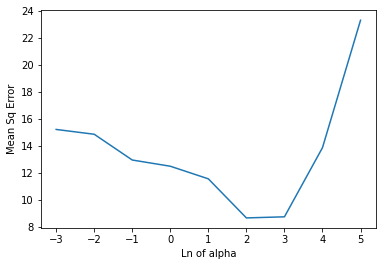

In [19]:
reg_par = [np.e**n for n in np.arange(-3,6,1)]

validation_scores = {}
print(" alpha  |  Sq.Error")
for param in reg_par:
    reg = MLPRegressor(max_iter=1000000, solver="adam", activation="tanh", hidden_layer_sizes=(5), alpha=param, random_state=1)
    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2, scoring="neg_mean_squared_error")
    validation_scores[param] = -score.mean()
    print("%0.5f |  %s" % (param, -score.mean()))

# Plot the error function
plt.plot([np.log(i) for i in validation_scores.keys()], list(validation_scores.values()));
plt.xlabel("Ln of alpha");
plt.ylabel("Mean Sq Error");

The lowest cross-validation error and the value to use for the `alpha` parameter is as follows:

In [20]:
min_score = ([np.log(name) for name, score in validation_scores.items() if score==min(validation_scores.values())][0])
# Find lowest value.
print("The lowest cross validation error is: %s" % (min(validation_scores.values())))
print("This corresponds to regularisation parameter e**%s" % min_score)

The lowest cross validation error is: 8.681543417643784
This corresponds to regularisation parameter e**2.0


### MSE after regularisation
5.2 best with (5,5), adam and tanh
Need to experiment more

In [21]:
# Fit data with the best parameter
reg = MLPRegressor(max_iter=1000000, solver="adam", activation="tanh", hidden_layer_sizes=(5), alpha=np.e**(min_score), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE final
mean_squared_error(y_pred,y_test)


MLPRegressor(activation='tanh', alpha=7.3890560989306495, batch_size='auto',
             beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=5, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

6.835964557040079

### Plot response curves

In [22]:
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.median()).transpose()

# View X_design_vec, which should contain the median of each respective column
X_design_vec.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_0,origin_1,origin_2
0,4.0,148.5,93.5,2803.5,15.5,76.0,1.0,0.0,0.0


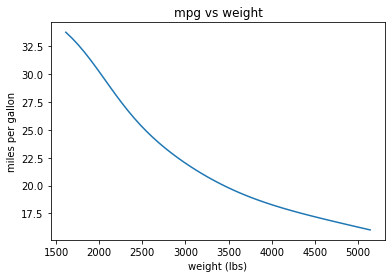

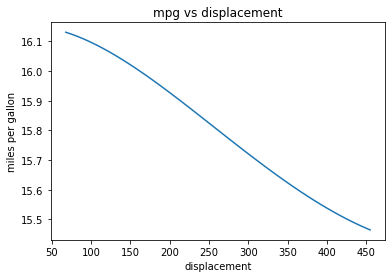

In [23]:
# Obtain the min and max of the weight variable and set up a sequence
min_res = min(X.loc[:,"weight"])
max_res = max(X.loc[:,"weight"])
seq = np.linspace(start=min_res,stop=max_res,num=50)

# Set up a list of moving resultants
to_predict = []
for result in seq:
    X_design_vec.loc[0,"weight"] = result
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
to_predict = scaler.transform(to_predict)
predictions = reg.predict(to_predict)

# Plot
plt.plot(seq,predictions)
plt.xlabel("weight (lbs)")
plt.ylabel("miles per gallon")
plt.title("mpg vs weight")
plt.show();

# Plot second curve

# Obtain the min and max of the weight variable and set up a sequence
min_res = min(X.loc[:,"displacement"])
max_res = max(X.loc[:,"displacement"])
seq = np.linspace(start=min_res,stop=max_res,num=50)

# Set up a list of moving resultants
to_predict = []
for result in seq:
    X_design_vec.loc[0,"displacement"] = result
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
to_predict = scaler.transform(to_predict)
predictions = reg.predict(to_predict)

# Plot
plt.plot(seq,predictions)
plt.xlabel("displacement")
plt.ylabel("miles per gallon")
plt.title("mpg vs displacement")
plt.show();